## Part 1: Fitting Models

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

In [6]:
X = ha.drop(columns=['output'])
y = ha['output']

# Splitting into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune 'n_neighbors'
knn.fit(X_train, y_train)

# Predict and Evaluate
y_pred_knn = knn.predict(X_test)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# ROC AUC for KNN
y_prob_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)


# Define parameter grid for KNN
knn_params = {'n_neighbors': range(1, 31)}  # Test k values from 1 to 30

# Perform Grid Search
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='roc_auc', n_jobs=-1)
knn_grid.fit(X_train, y_train)

# Output the best hyperparameters and score
print("Best KNN Parameters:", knn_grid.best_params_)
print("Best KNN ROC AUC Score:", knn_grid.best_score_)

# Train with the best parameters and evaluate on test set
best_knn = knn_grid.best_estimator_
y_prob_knn_best = best_knn.predict_proba(X_test)[:, 1]
fpr_knn_best, tpr_knn_best, _ = roc_curve(y_test, y_prob_knn_best)
roc_auc_knn_best = auc(fpr_knn_best, tpr_knn_best)


Best KNN Parameters: {'n_neighbors': 23}
Best KNN ROC AUC Score: 0.7712719298245615


In [8]:
# Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict and Evaluate
y_pred_logreg = logreg.predict(X_test)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# ROC AUC for Logistic Regression
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
# The roc_auc_score function needs the true labels (y_test) and the predicted probabilities (y_prob_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)

# Define parameter grid for Logistic Regression
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # L1 (lasso) or L2 (ridge) regularization
    'solver': ['liblinear']  # Solver that supports L1 and L2 penalties
}

# Perform Grid Search
logreg_grid = GridSearchCV(LogisticRegression(max_iter=1000), logreg_params, cv=5, scoring='roc_auc', n_jobs=-1)
logreg_grid.fit(X_train, y_train)

# Output the best hyperparameters and score
print("Best Logistic Regression Parameters:", logreg_grid.best_params_)
print("Best Logistic Regression ROC AUC Score:", logreg_grid.best_score_)

# Train with the best parameters and evaluate on test set
best_logreg = logreg_grid.best_estimator_
y_prob_logreg_best = best_logreg.predict_proba(X_test)[:, 1]
fpr_logreg_best, tpr_logreg_best, _ = roc_curve(y_test, y_prob_logreg_best)
roc_auc_logreg_best = auc(fpr_logreg_best, tpr_logreg_best)

Best Logistic Regression Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Logistic Regression ROC AUC Score: 0.897046783625731


In [9]:
# Decision Tree Model
tree = DecisionTreeClassifier(max_depth=3, random_state=42)  # You can tune 'max_depth'
tree.fit(X_train, y_train)

# Predict and Evaluate
y_pred_tree = tree.predict(X_test)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# ROC AUC for Decision Tree
y_prob_tree = tree.predict_proba(X_test)[:, 1]
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
# Use roc_auc_score instead of auc to calculate the ROC AUC
roc_auc_tree = roc_auc_score(y_test, y_prob_tree)

# Define parameter grid for Decision Tree
tree_params = {
    'max_depth': range(1, 21),  # Test tree depths from 1 to 20
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4]  # Minimum samples in a leaf node
}

# Perform Grid Search
tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_params, cv=5, scoring='roc_auc', n_jobs=-1)
tree_grid.fit(X_train, y_train)

# Output the best hyperparameters and score
print("Best Decision Tree Parameters:", tree_grid.best_params_)
print("Best Decision Tree ROC AUC Score:", tree_grid.best_score_)

# Train with the best parameters and evaluate on test set
best_tree = tree_grid.best_estimator_
y_prob_tree_best = best_tree.predict_proba(X_test)[:, 1]
fpr_tree_best, tpr_tree_best, _ = roc_curve(y_test, y_prob_tree_best)
roc_auc_tree_best = auc(fpr_tree_best, tpr_tree_best)


Best Decision Tree Parameters: {'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Decision Tree ROC AUC Score: 0.8164327485380116


In [10]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
tree_params = {
    'max_depth': range(1, 21),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 5)
}

# Perform Randomized Search
tree_random = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), tree_params, n_iter=100, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
tree_random.fit(X_train, y_train)

# Output the best hyperparameters and score
print("Best Randomized Search Decision Tree Parameters:", tree_random.best_params_)
print("Best Randomized Search ROC AUC Score:", tree_random.best_score_)

# Collect results
results = {
    'Model': ['KNN', 'Logistic Regression', 'Decision Tree'],
    'Best Hyperparameters': [knn_grid.best_params_, logreg_grid.best_params_, tree_grid.best_params_],
    'Best CV ROC AUC': [knn_grid.best_score_, logreg_grid.best_score_, tree_grid.best_score_],
    'Test ROC AUC': [roc_auc_knn_best, roc_auc_logreg_best, roc_auc_tree_best]
}

# Create a summary DataFrame
results_df = pd.DataFrame(results)
print(results_df)


Best Randomized Search Decision Tree Parameters: {'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 2}
Best Randomized Search ROC AUC Score: 0.8164327485380116
                 Model                               Best Hyperparameters  \
0                  KNN                                {'n_neighbors': 23}   
1  Logistic Regression   {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}   
2        Decision Tree  {'max_depth': 2, 'min_samples_leaf': 4, 'min_s...   

   Best CV ROC AUC  Test ROC AUC  
0         0.771272      0.608394  
1         0.897047      0.777778  
2         0.816433      0.708333  


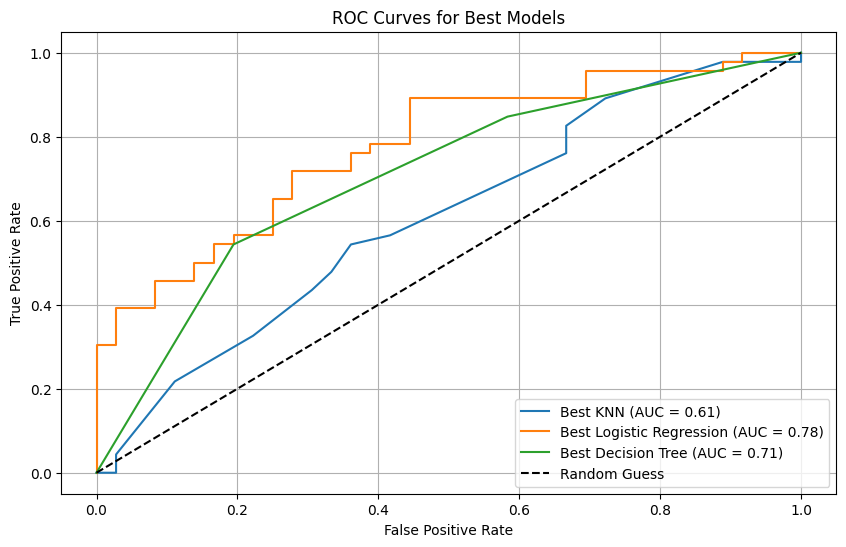

In [11]:
# Plot best ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_knn_best, tpr_knn_best, label=f'Best KNN (AUC = {roc_auc_knn_best:.2f})')
plt.plot(fpr_logreg_best, tpr_logreg_best, label=f'Best Logistic Regression (AUC = {roc_auc_logreg_best:.2f})')
plt.plot(fpr_tree_best, tpr_tree_best, label=f'Best Decision Tree (AUC = {roc_auc_tree_best:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curves for Best Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## Part 2: Metrics

In [12]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, recall_score, precision_score, confusion_matrix

# Custom scorer for Specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]
    fp = cm[0, 1]
    return tn / (tn + fp)

specificity = make_scorer(specificity_score)

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

models = {
    "KNN": KNeighborsClassifier(n_neighbors=knn_grid.best_params_['n_neighbors']),  # Using best KNN from Grid Search
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Cross-validation metrics
scoring = {
    'Recall': 'recall',
    'Precision': 'precision',
    'Specificity': specificity
}

for model_name, model in models.items():
    print(f"Metrics for {model_name}:")
    scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=5)
    print(f"  Recall: {scores['test_Recall'].mean():.2f}")
    print(f"  Precision: {scores['test_Precision'].mean():.2f}")
    print(f"  Specificity: {scores['test_Specificity'].mean():.2f}")
    print("-" * 30)


Metrics for KNN:
  Recall: 0.75
  Precision: 0.71
  Specificity: 0.63
------------------------------
Metrics for Logistic Regression:
  Recall: 0.82
  Precision: 0.80
  Specificity: 0.76
------------------------------
Metrics for Decision Tree:
  Recall: 0.71
  Precision: 0.71
  Specificity: 0.68
------------------------------


## Part 3: Discussion

Q1
The hospital faces severe lawsuits if they deem a patient to be low risk, and that patient later experiences a heart attack.

- important metric: high recall ensuring that all patients at risk are flagged (minimize false negatives)
- it is recommended that the logistic model is used, as it has the highest recall

Q2
The hospital is overfull, and wants to only use bed space for patients most in need of monitoring due to heart attack risk.

- important metric: high precision is preferred as it would ensure the patients who are most at risk are flagged (minimize flase positives)
- The logistic models also has the highest precision, therefore is recommended for this case

Q3
The hospital is studying root causes of heart attacks, and would like to understand which biological measures are associated with heart attack risk.

- The model that allows for the easiest interpretation of the variables should be used, as all have similar tests of recall, precision, and specificity. So, it is up to the interpreter to decide which to use based on their understanding.

Q4
The hospital is training a new batch of doctors, and they would like to compare the diagnoses of these doctors to the predictions given by the algorithm to measure the ability of new doctors to diagnose patients.

- It's important that there is a balance between the metrics that the model provides. The decision tree model offers the most balance and is therefore recommended.

## Part 4: Validation

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

# Ensure Decision Tree is optimized using GridSearchCV
dt_params = {
    "max_depth": range(1, 11),  # Test max_depth from 1 to 10
    "min_samples_split": range(2, 11),  # Test min_samples_split from 2 to 10
}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5, scoring="roc_auc", n_jobs=-1)
dt_grid.fit(X_train, y_train)

# Retrieve the best estimator for the Decision Tree
best_decision_tree = dt_grid.best_estimator_

# Fit all models on the training set
best_knn.fit(X_train, y_train)
best_log_reg.fit(X_train, y_train)
best_decision_tree.fit(X_train, y_train)

# Define a function to evaluate the model on the validation set
def evaluate_model(model, X_val, y_val, model_name):
    # Predict probabilities and labels
    y_prob = model.predict_proba(X_val)[:, 1]
    y_pred = model.predict(X_val)

    # Calculate metrics
    conf_matrix = confusion_matrix(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_prob)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)

    # Print metrics
    print(f"Model: {model_name}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("-" * 30)

# Evaluate each model on the validation set
evaluate_model(best_knn, X_val, y_val, "KNN")
evaluate_model(best_log_reg, X_val, y_val, "Logistic Regression")
evaluate_model(best_decision_tree, X_val, y_val, "Decision Tree")


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Model: KNN
Confusion Matrix:
[[ 6  5]
 [ 6 13]]
ROC AUC: 0.7010
Precision: 0.7222
Recall: 0.6842
------------------------------
Model: Logistic Regression
Confusion Matrix:
[[ 9  2]
 [ 3 16]]
ROC AUC: 0.8756
Precision: 0.8889
Recall: 0.8421
------------------------------
Model: Decision Tree
Confusion Matrix:
[[ 8  3]
 [ 6 13]]
ROC AUC: 0.7775
Precision: 0.8125
Recall: 0.6842
------------------------------


The logistic model performed best on the validation test and most similarly to how it performed on the training data, making it the most reliable model to use for future use and predictions.

## Part 5: Cohen's Kappa

In [23]:
from sklearn.metrics import cohen_kappa_score

# Define a function to evaluate Cohen's Kappa for a model
def evaluate_with_kappa(model, X_val, y_val, model_name):
    # Predict labels for the validation set
    y_pred = model.predict(X_val)

    # Calculate Cohen's Kappa
    kappa = cohen_kappa_score(y_val, y_pred)

    # Print the result
    print(f"Model: {model_name}")
    print(f"Cohen's Kappa: {kappa:.4f}")
    print("-" * 30)

# Evaluate each model on the validation set using Cohen's Kappa
evaluate_with_kappa(best_knn, X_val, y_val, "KNN")
evaluate_with_kappa(best_log_reg, X_val, y_val, "Logistic Regression")
evaluate_with_kappa(best_decision_tree, X_val, y_val, "Decision Tree")


Model: KNN
Cohen's Kappa: 0.2254
------------------------------
Model: Logistic Regression
Cohen's Kappa: 0.6479
------------------------------
Model: Decision Tree
Cohen's Kappa: 0.3891
------------------------------


Cohen's Kappa is most commonly used and preferred when there are class imbalances in the data, or if interpreters want to ensure consistent classification accross different datasets. In our case specifically, Cohen's Kappa is clearly highest for the logistic model, which is consistent for the other metrics, reiterating that the logistic model is preferred.